Best Model : LSTM on Hist. of pixels ( 16 bin) 

In [1]:
import math
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from numpy import array

from keras.layers import Convolution2D, MaxPooling2D, Flatten, Reshape,Conv2D
from keras.models import Sequential
from keras.layers.wrappers import TimeDistributed
from keras.utils import np_utils

import numpy as np
import cv2
from keras.preprocessing.image import img_to_array


import matplotlib.pyplot as plt
%matplotlib inline

import pandas
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,LSTM
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D

from keras.preprocessing.image import ImageDataGenerator
from keras import models
from numpy import array


from keras import backend as K
from sklearn.metrics import mean_absolute_error
from keras import optimizers
from keras.layers import Bidirectional


/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
results_rmse = []
results_mae = []
results_std = []

In [3]:
import numpy 

# Model 1 : LSTM with 16 bins hist of pixel vals

In [6]:
def train_bin_models(num_bins):
    numpy.random.seed(3)
    time_steps=19
    # load the dataset
    dataframe = pandas.read_csv('./Trainold.csv')
    dataset = dataframe.values

    scaler = MinMaxScaler(feature_range=(0, 1))


    #print(dataset)

    # we group by day so we can process a video at a time.
    grouped = dataframe.groupby(dataframe.VidName)

    per_vid = []
    for _, group in grouped:
        per_vid.append(group)



    print(len(per_vid))



    trainX=[]
    trainY=[]

    # generate sequences a vid at a time
    for i,vid in enumerate(per_vid):
        histValuesList=[]
        scoreList=[]
        # if we have less than 20 datapoints for a vid we skip over the
        # vid assuming something is missing in the raw data

        total = vid.iloc[:,4:20].values
        vidImPath=vid.iloc[:,0:2].values    

        if len(total) < time_steps :
            continue
        scoreVal=vid["Score"].values[0] + 1    
        max_total_for_vid = scoreVal.tolist()
        #max_total_for_vid = vid["Score"].values[0].tolist()

        for i in range(0,time_steps):
            videoName=vidImPath[i][0]
            imgName=vidImPath[i][1]
            path="./IMAGES/Train/"+videoName+"/"+imgName
            image = cv2.imread(path,0)
            hist = cv2.calcHist([image],[0],None,[num_bins],[0,256])

            hist_arr = hist.flatten()
            #img_arr = img_to_array(image)
            histValuesList.append(hist_arr)
            #scoreList.append(max_total_for_vid)

        trainX.append(histValuesList)
        trainY.append([max_total_for_vid])
        #trainY.append(scoreList)


    print(len(trainX[0]))
    #trainX = np.array([np.array(xi) for xi in trainX])

    trainX=numpy.array(trainX)
    trainY=numpy.array(trainY)

    print(trainX.shape,trainY.shape)









    time_steps=19
    # load the dataset
    dataframe = pandas.read_csv('./Test.csv')
    dataset = dataframe.values

    #print(dataset)

    # we group by day so we can process a video at a time.
    grouped = dataframe.groupby(dataframe.VidName)

    per_vid = []
    for _, group in grouped:
        per_vid.append(group)



    print(len(per_vid))



    testX=[]
    testY=[]

    # generate sequences a vid at a time
    for i,vid in enumerate(per_vid):
        histValuesList=[]
        scoreList=[]
        # if we have less than 20 datapoints for a vid we skip over the
        # vid assuming something is missing in the raw data

        total = vid.iloc[:,4:20].values

        vidImPath=vid.iloc[:,0:2].values


        if len(total)<time_steps :
            continue
        scoreVal=vid["Score"].values[0] + 1    
        max_total_for_vid = scoreVal.tolist()
        #max_total_for_vid = vid["Score"].values[0].tolist()


        for i in range(0,time_steps):
            #histValuesList.append(total[i])
            #print("Vid and Img name")
            #print(req[i][0],req[i][1])
            videoName=vidImPath[i][0]
            imgName=vidImPath[i][1]
            path="./IMAGES/Test/"+videoName+"/"+imgName
            image = cv2.imread(path,0)
            hist = cv2.calcHist([image],[0],None,[num_bins],[0,256])
            hist_arr = hist.flatten()

            histValuesList.append(hist_arr)
            #scoreList.append(max_total_for_vid)


        testX.append(histValuesList)
        testY.append([max_total_for_vid])
        #testY.append(scoreList)


    print(len(testX[0]))
    #trainX = np.array([np.array(xi) for xi in trainX])

    testX=numpy.array(testX)
    testY=numpy.array(testY)

    print(testX.shape,testY.shape)


    trainX=numpy.array(trainX)
    trainX=trainX.reshape(-1,num_bins)
    trainX=trainX.reshape(-1,19,num_bins)
    print(numpy.max(trainX))


    testX=numpy.array(testX)
    testX=testX.reshape(-1,num_bins)
    testX=testX.reshape(-1,19,num_bins)
    print(numpy.max(testX))






    trainX=numpy.array(trainX)
    trainX=trainX.reshape(-1,num_bins)

    trainX = trainX/numpy.max(trainX)

    trainX=trainX.reshape(-1,19,num_bins)
    print(trainX.shape,trainY.shape)




    testX=numpy.array(testX)
    testX=testX.reshape(-1,num_bins)

    testX = testX/numpy.max(testX)

    testX=testX.reshape(-1,19,num_bins)
    print(testX.shape,testY.shape)




    print(trainX.shape,trainY.shape)
    print(testX.shape,testY.shape)
    #print(valX.shape,valY.shape)







    # All parameter gradients will be clipped to
    # a maximum norm of 1.

    adam1 = optimizers.Adam(lr=0.001)
    sgd1 = optimizers.SGD(lr=0.005) #0.005 or 6,100 neurons (1.24,1.12 with 0.003 and 0.2 )

    print('Build model...')
    # Build Model
    model = Sequential()  
    model.add(LSTM(100, input_shape=(19, num_bins))) #100
    model.add(Dense(1))
    model.add(Dropout(0.1))


    model.compile(loss='mse', optimizer=sgd1, metrics=['mse'])
    #model.compile(loss='mse', optimizer=sgd1,metrics=['mean_squared_error'])
    history =model.fit(trainX, trainY, nb_epoch=500, batch_size=20, verbose=2,shuffle=True) #500 batch =2     

    







    # make predictions
    trainPredict = model.predict(trainX)


    trainScore = mean_squared_error(trainY, trainPredict)
    print('Train Score: %.2f MSE' % (trainScore))




    from keras import backend as K

    def root_mean_squared_error(y_true, y_pred):
            return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

    pred=model.predict(testX)

    print(pred.shape)
    print(testY.shape)



    # calculate root mean squared error
    #trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    #print('Train Score: %.2f RMSE' % (trainScore))
    testScore = mean_squared_error(testY, pred)
    print('Test Score: %.2f MSE' % (testScore))

    #maeScore = root_mean_squared_error(testY, pred)
    #print('RMSE Score: %.2f MAE' % (maeScore))

    rmse = np.sqrt(((pred - testY) ** 2).mean(axis=0))
    print('RMSE Score: %.2f rmse' % (rmse))


    mae = mean_absolute_error(testY, pred)
    print('MAE Score: %.2f mae' % (mae))
    
    
    
    list1=[]
    list2=[]
    diff=[]
    
    for i in range(0,len(pred)):

        print(testY[i],pred[i])
        list1.append(testY[i])
        list2.append(pred[i])
        diff.append(abs(testY[i]-pred[i]))
        
    print(numpy.mean(diff))
    stdVals=numpy.std(diff)
        
    results_rmse.append(rmse)
    results_mae.append(mae)
    
    #stdVals = np.std(testY-pred)
    print(stdVals)
    results_std.append(stdVals)
    

In [7]:
# Model 1 : LSTM with 16 bins hist of pixel vals

num_bins=16
train_bin_models(num_bins)


117
19
(114, 19, 16) (114, 1)
55
19
(52, 19, 16) (52, 1)
174999.0
157653.0
(114, 19, 16) (114, 1)
(52, 19, 16) (52, 1)
(114, 19, 16) (114, 1)
(52, 19, 16) (52, 1)
Build model...


/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/500
 - 1s - loss: 3.2207 - mean_squared_error: 3.2207
Epoch 2/500
 - 0s - loss: 2.6434 - mean_squared_error: 2.6434
Epoch 3/500
 - 0s - loss: 2.2862 - mean_squared_error: 2.2862
Epoch 4/500
 - 0s - loss: 1.8721 - mean_squared_error: 1.8721
Epoch 5/500
 - 0s - loss: 1.7192 - mean_squared_error: 1.7192
Epoch 6/500
 - 0s - loss: 1.4601 - mean_squared_error: 1.4601
Epoch 7/500
 - 0s - loss: 1.6363 - mean_squared_error: 1.6363
Epoch 8/500
 - 0s - loss: 1.2654 - mean_squared_error: 1.2654
Epoch 9/500
 - 0s - loss: 1.3202 - mean_squared_error: 1.3202
Epoch 10/500
 - 0s - loss: 1.3635 - mean_squared_error: 1.3635
Epoch 11/500
 - 0s - loss: 1.2775 - mean_squared_error: 1.2775
Epoch 12/500
 - 0s - loss: 1.3327 - mean_squared_error: 1.3327
Epoch 13/500
 - 0s - loss: 1.2622 - mean_squared_error: 1.2622
Epoch 14/500
 - 0s - loss: 1.1279 - mean_squared_error: 1.1279
Epoch 15/500
 - 0s - loss: 1.1549 - mean_squared_error: 1.1549
Epoch 16/500
 - 0s - loss: 1.2331 - mean_squared_error: 1.2331
E

Epoch 131/500
 - 0s - loss: 1.2491 - mean_squared_error: 1.2491
Epoch 132/500
 - 0s - loss: 1.2365 - mean_squared_error: 1.2365
Epoch 133/500
 - 0s - loss: 1.1553 - mean_squared_error: 1.1553
Epoch 134/500
 - 0s - loss: 1.2845 - mean_squared_error: 1.2845
Epoch 135/500
 - 0s - loss: 1.0836 - mean_squared_error: 1.0836
Epoch 136/500
 - 0s - loss: 1.3284 - mean_squared_error: 1.3284
Epoch 137/500
 - 0s - loss: 1.0988 - mean_squared_error: 1.0988
Epoch 138/500
 - 0s - loss: 1.2013 - mean_squared_error: 1.2013
Epoch 139/500
 - 0s - loss: 1.2476 - mean_squared_error: 1.2476
Epoch 140/500
 - 0s - loss: 1.3626 - mean_squared_error: 1.3626
Epoch 141/500
 - 0s - loss: 1.2781 - mean_squared_error: 1.2781
Epoch 142/500
 - 0s - loss: 1.3488 - mean_squared_error: 1.3488
Epoch 143/500
 - 0s - loss: 1.3246 - mean_squared_error: 1.3246
Epoch 144/500
 - 0s - loss: 1.1699 - mean_squared_error: 1.1699
Epoch 145/500
 - 0s - loss: 1.1512 - mean_squared_error: 1.1512
Epoch 146/500
 - 0s - loss: 1.3803 - mea

 - 0s - loss: 1.3080 - mean_squared_error: 1.3080
Epoch 260/500
 - 0s - loss: 1.2767 - mean_squared_error: 1.2767
Epoch 261/500
 - 0s - loss: 1.4344 - mean_squared_error: 1.4344
Epoch 262/500
 - 0s - loss: 1.3346 - mean_squared_error: 1.3346
Epoch 263/500
 - 0s - loss: 1.0387 - mean_squared_error: 1.0387
Epoch 264/500
 - 0s - loss: 1.0292 - mean_squared_error: 1.0292
Epoch 265/500
 - 0s - loss: 1.1427 - mean_squared_error: 1.1427
Epoch 266/500
 - 0s - loss: 1.3349 - mean_squared_error: 1.3349
Epoch 267/500
 - 0s - loss: 1.0729 - mean_squared_error: 1.0729
Epoch 268/500
 - 0s - loss: 1.2400 - mean_squared_error: 1.2400
Epoch 269/500
 - 0s - loss: 1.1884 - mean_squared_error: 1.1884
Epoch 270/500
 - 0s - loss: 0.9849 - mean_squared_error: 0.9849
Epoch 271/500
 - 0s - loss: 1.2937 - mean_squared_error: 1.2937
Epoch 272/500
 - 0s - loss: 1.2386 - mean_squared_error: 1.2386
Epoch 273/500
 - 0s - loss: 1.2886 - mean_squared_error: 1.2886
Epoch 274/500
 - 0s - loss: 1.1508 - mean_squared_erro

Epoch 388/500
 - 0s - loss: 1.1510 - mean_squared_error: 1.1510
Epoch 389/500
 - 0s - loss: 1.1952 - mean_squared_error: 1.1952
Epoch 390/500
 - 0s - loss: 1.1039 - mean_squared_error: 1.1039
Epoch 391/500
 - 0s - loss: 0.9997 - mean_squared_error: 0.9997
Epoch 392/500
 - 0s - loss: 1.1008 - mean_squared_error: 1.1008
Epoch 393/500
 - 0s - loss: 1.3108 - mean_squared_error: 1.3108
Epoch 394/500
 - 0s - loss: 1.2806 - mean_squared_error: 1.2806
Epoch 395/500
 - 0s - loss: 1.2923 - mean_squared_error: 1.2923
Epoch 396/500
 - 0s - loss: 1.1562 - mean_squared_error: 1.1562
Epoch 397/500
 - 0s - loss: 1.1506 - mean_squared_error: 1.1506
Epoch 398/500
 - 0s - loss: 0.9783 - mean_squared_error: 0.9783
Epoch 399/500
 - 0s - loss: 1.1471 - mean_squared_error: 1.1471
Epoch 400/500
 - 0s - loss: 1.0877 - mean_squared_error: 1.0877
Epoch 401/500
 - 0s - loss: 1.0972 - mean_squared_error: 1.0972
Epoch 402/500
 - 0s - loss: 1.2007 - mean_squared_error: 1.2007
Epoch 403/500
 - 0s - loss: 1.1966 - mea

# Model 2 : LSTM with Hist of Color 3d (10 bins)

In [8]:
def train_colorbin_models(num_bins):
    numpy.random.seed(3)
    time_steps=19
    # load the dataset
    dataframe = pandas.read_csv('./Trainold.csv')
    dataset = dataframe.values

    scaler = MinMaxScaler(feature_range=(0, 1))


    #print(dataset)

    # we group by day so we can process a video at a time.
    grouped = dataframe.groupby(dataframe.VidName)

    per_vid = []
    for _, group in grouped:
        per_vid.append(group)



    print(len(per_vid))



    trainX=[]
    trainY=[]

    # generate sequences a vid at a time
    for i,vid in enumerate(per_vid):
        histValuesList=[]
        scoreList=[]
        # if we have less than 20 datapoints for a vid we skip over the
        # vid assuming something is missing in the raw data

        total = vid.iloc[:,4:20].values
        vidImPath=vid.iloc[:,0:2].values    

        if len(total) < time_steps :
            continue
        scoreVal=vid["Score"].values[0] + 1    
        max_total_for_vid = scoreVal.tolist()
        #max_total_for_vid = vid["Score"].values[0].tolist()

        for i in range(0,time_steps):
            videoName=vidImPath[i][0]
            imgName=vidImPath[i][1]
            path="./IMAGES/Train/"+videoName+"/"+imgName
            image = cv2.imread(path)
            hist = cv2.calcHist([image], [0, 1, 2], None, [num_bins, num_bins, num_bins], [0, 256, 0, 256, 0, 256])
            hist_arr = hist.flatten()
            #img_arr = img_to_array(image)
            histValuesList.append(hist_arr)
            #scoreList.append(max_total_for_vid)

        trainX.append(histValuesList)
        trainY.append([max_total_for_vid])
        #trainY.append(scoreList)


    print(len(trainX[0]))
    #trainX = np.array([np.array(xi) for xi in trainX])

    trainX=numpy.array(trainX)
    trainY=numpy.array(trainY)

    print(trainX.shape,trainY.shape)




    # load the dataset
    dataframe = pandas.read_csv('./Test.csv')
    dataset = dataframe.values

    #print(dataset)

    # we group by day so we can process a video at a time.
    grouped = dataframe.groupby(dataframe.VidName)

    per_vid = []
    for _, group in grouped:
        per_vid.append(group)



    print(len(per_vid))



    testX=[]
    testY=[]

    # generate sequences a vid at a time
    for i,vid in enumerate(per_vid):
        histValuesList=[]
        scoreList=[]
        # if we have less than 20 datapoints for a vid we skip over the
        # vid assuming something is missing in the raw data

        total = vid.iloc[:,4:20].values

        vidImPath=vid.iloc[:,0:2].values


        if len(total)<time_steps :
            continue
        scoreVal=vid["Score"].values[0] + 1    
        max_total_for_vid = scoreVal.tolist()
        #max_total_for_vid = vid["Score"].values[0].tolist()


        for i in range(0,time_steps):
            #histValuesList.append(total[i])
            #print("Vid and Img name")
            #print(req[i][0],req[i][1])
            videoName=vidImPath[i][0]
            imgName=vidImPath[i][1]
            path="./IMAGES/Test/"+videoName+"/"+imgName
            image = cv2.imread(path)
            #img_arr = img_to_array(image)
            hist = cv2.calcHist([image], [0, 1, 2], None, [num_bins, num_bins, num_bins], [0, 256, 0, 256, 0, 256])
            hist_arr = hist.flatten()

            histValuesList.append(hist_arr)
            #scoreList.append(max_total_for_vid)


        testX.append(histValuesList)
        testY.append([max_total_for_vid])
        #testY.append(scoreList)


    print(len(testX[0]))
    #trainX = np.array([np.array(xi) for xi in trainX])

    testX=numpy.array(testX)
    testY=numpy.array(testY)

    print(testX.shape,testY.shape)




    trainX=numpy.array(trainX)
    trainX=trainX.reshape(-1,num_bins**3)

    trainX = trainX/numpy.max(trainX)

    trainX=trainX.reshape(-1,19,num_bins**3)
    print(trainX.shape,trainY.shape)




    testX=numpy.array(testX)
    testX=testX.reshape(-1,num_bins**3)

    testX = testX/numpy.max(testX)

    testX=testX.reshape(-1,19,num_bins**3)
    print(testX.shape,testY.shape)




    adam1 = optimizers.Adam(lr=0.001)
    sgd1 = optimizers.SGD(lr=0.005)

    print('Build model...')
    # Build Model
    model = Sequential()  
    model.add(LSTM(100, input_shape=(19, num_bins**3))) #200
    model.add(Dense(1))
    model.add(Dropout(0.1))
    model.compile(loss='mse', optimizer=sgd1,metrics=['mse'])
    model.fit(trainX, trainY, nb_epoch=500, batch_size=19, verbose=2,shuffle=True) #500 batch =20     


    # make predictions
    trainPredict = model.predict(trainX)


    trainScore = mean_squared_error(trainY, trainPredict)
    print('Train Score: %.2f MSE' % (trainScore))






    def root_mean_squared_error(y_true, y_pred):
            return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

    pred=model.predict(testX)

    print(pred.shape)
    print(testY.shape)



    testScore = mean_squared_error(testY, pred)
    print('Test Score: %.2f MSE' % (testScore))

    #maeScore = root_mean_squared_error(testY, pred)
    #print('RMSE Score: %.2f MAE' % (maeScore))

    rmse = np.sqrt(((pred - testY) ** 2).mean(axis=0))
    print('RMSE Score: %.2f rmse' % (rmse))

    mae = mean_absolute_error(testY, pred)
    print('MAE Score: %.2f mae' % (mae))

    
    
    list1=[]
    list2=[]
    diff=[]
    
    for i in range(0,len(pred)):

        print(testY[i],pred[i])
        list1.append(testY[i])
        list2.append(pred[i])
        diff.append(abs(testY[i]-pred[i]))
        
    print(numpy.mean(diff))
    stdVals=numpy.std(diff)
        
    results_rmse.append(rmse)
    results_mae.append(mae)
    
    #stdVals = np.std(testY-pred)
    print(stdVals)
    results_std.append(stdVals)
    

In [9]:
# Model 2 : LSTM with Hist of Color 3d (10 bins)
num_bins=10
train_colorbin_models(num_bins)

117
19
(114, 19, 1000) (114, 1)
55
19
(52, 19, 1000) (52, 1)
(114, 19, 1000) (114, 1)
(52, 19, 1000) (52, 1)
Build model...


/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/500
 - 1s - loss: 3.0719 - mean_squared_error: 3.0719
Epoch 2/500
 - 0s - loss: 2.5392 - mean_squared_error: 2.5392
Epoch 3/500
 - 0s - loss: 2.0701 - mean_squared_error: 2.0701
Epoch 4/500
 - 0s - loss: 1.8836 - mean_squared_error: 1.8836
Epoch 5/500
 - 0s - loss: 1.6252 - mean_squared_error: 1.6252
Epoch 6/500
 - 0s - loss: 1.3860 - mean_squared_error: 1.3860
Epoch 7/500
 - 0s - loss: 1.3157 - mean_squared_error: 1.3157
Epoch 8/500
 - 0s - loss: 1.5991 - mean_squared_error: 1.5991
Epoch 9/500
 - 0s - loss: 1.3156 - mean_squared_error: 1.3156
Epoch 10/500
 - 0s - loss: 1.1506 - mean_squared_error: 1.1506
Epoch 11/500
 - 0s - loss: 1.2377 - mean_squared_error: 1.2377
Epoch 12/500
 - 0s - loss: 1.2996 - mean_squared_error: 1.2996
Epoch 13/500
 - 0s - loss: 1.2912 - mean_squared_error: 1.2912
Epoch 14/500
 - 0s - loss: 1.3927 - mean_squared_error: 1.3927
Epoch 15/500
 - 0s - loss: 1.3172 - mean_squared_error: 1.3172
Epoch 16/500
 - 0s - loss: 1.2970 - mean_squared_error: 1.2970
E

Epoch 131/500
 - 0s - loss: 1.4198 - mean_squared_error: 1.4198
Epoch 132/500
 - 0s - loss: 1.1338 - mean_squared_error: 1.1338
Epoch 133/500
 - 0s - loss: 1.3419 - mean_squared_error: 1.3419
Epoch 134/500
 - 0s - loss: 1.1454 - mean_squared_error: 1.1454
Epoch 135/500
 - 0s - loss: 1.1366 - mean_squared_error: 1.1366
Epoch 136/500
 - 0s - loss: 1.2018 - mean_squared_error: 1.2018
Epoch 137/500
 - 0s - loss: 1.0860 - mean_squared_error: 1.0860
Epoch 138/500
 - 0s - loss: 1.2781 - mean_squared_error: 1.2781
Epoch 139/500
 - 0s - loss: 1.2056 - mean_squared_error: 1.2056
Epoch 140/500
 - 0s - loss: 1.2719 - mean_squared_error: 1.2719
Epoch 141/500
 - 0s - loss: 1.1054 - mean_squared_error: 1.1054
Epoch 142/500
 - 0s - loss: 1.0568 - mean_squared_error: 1.0568
Epoch 143/500
 - 0s - loss: 1.4231 - mean_squared_error: 1.4231
Epoch 144/500
 - 0s - loss: 1.1394 - mean_squared_error: 1.1394
Epoch 145/500
 - 0s - loss: 1.2380 - mean_squared_error: 1.2380
Epoch 146/500
 - 0s - loss: 1.6627 - mea

 - 0s - loss: 1.1744 - mean_squared_error: 1.1744
Epoch 260/500
 - 0s - loss: 1.0588 - mean_squared_error: 1.0588
Epoch 261/500
 - 0s - loss: 1.3966 - mean_squared_error: 1.3966
Epoch 262/500
 - 0s - loss: 1.2244 - mean_squared_error: 1.2244
Epoch 263/500
 - 0s - loss: 1.3100 - mean_squared_error: 1.3100
Epoch 264/500
 - 0s - loss: 1.1230 - mean_squared_error: 1.1230
Epoch 265/500
 - 0s - loss: 1.1207 - mean_squared_error: 1.1207
Epoch 266/500
 - 0s - loss: 1.1743 - mean_squared_error: 1.1743
Epoch 267/500
 - 0s - loss: 1.1105 - mean_squared_error: 1.1105
Epoch 268/500
 - 0s - loss: 0.9969 - mean_squared_error: 0.9969
Epoch 269/500
 - 0s - loss: 1.1646 - mean_squared_error: 1.1646
Epoch 270/500
 - 0s - loss: 1.1306 - mean_squared_error: 1.1306
Epoch 271/500
 - 0s - loss: 1.2587 - mean_squared_error: 1.2587
Epoch 272/500
 - 0s - loss: 1.4048 - mean_squared_error: 1.4048
Epoch 273/500
 - 0s - loss: 1.5115 - mean_squared_error: 1.5115
Epoch 274/500
 - 0s - loss: 1.0687 - mean_squared_erro

Epoch 388/500
 - 0s - loss: 1.3842 - mean_squared_error: 1.3842
Epoch 389/500
 - 0s - loss: 1.0311 - mean_squared_error: 1.0311
Epoch 390/500
 - 0s - loss: 1.1718 - mean_squared_error: 1.1718
Epoch 391/500
 - 0s - loss: 1.1103 - mean_squared_error: 1.1103
Epoch 392/500
 - 0s - loss: 0.9008 - mean_squared_error: 0.9008
Epoch 393/500
 - 0s - loss: 1.0311 - mean_squared_error: 1.0311
Epoch 394/500
 - 0s - loss: 0.9937 - mean_squared_error: 0.9937
Epoch 395/500
 - 0s - loss: 0.9963 - mean_squared_error: 0.9963
Epoch 396/500
 - 0s - loss: 1.2115 - mean_squared_error: 1.2115
Epoch 397/500
 - 0s - loss: 0.9807 - mean_squared_error: 0.9807
Epoch 398/500
 - 0s - loss: 1.0810 - mean_squared_error: 1.0810
Epoch 399/500
 - 0s - loss: 1.0120 - mean_squared_error: 1.0120
Epoch 400/500
 - 0s - loss: 1.1539 - mean_squared_error: 1.1539
Epoch 401/500
 - 0s - loss: 0.9627 - mean_squared_error: 0.9627
Epoch 402/500
 - 0s - loss: 0.9058 - mean_squared_error: 0.9058
Epoch 403/500
 - 0s - loss: 0.9904 - mea

# Model 3 : CNN-LSTM

In [10]:
# Model 3 : CNN-LSTM 

from keras.models import load_model

model = load_model('./CNNLSTM.h5')



time_steps=19
# load the dataset
dataframe = pandas.read_csv('./Test.csv')
dataset = dataframe.values

#print(dataset)

# we group by day so we can process a video at a time.
grouped = dataframe.groupby(dataframe.VidName)

per_vid = []
for _, group in grouped:
    per_vid.append(group)
    
    

print(len(per_vid))



testX=[]
testY=[]

# generate sequences a vid at a time
for i,vid in enumerate(per_vid):
    histValuesList=[]
    scoreList=[]
    # if we have less than 8 datapoints for a vid we skip over the
    # vid assuming something is missing in the raw data
    
    total = vid.iloc[:,4:20].values

    vidImPath=vid.iloc[:,0:2].values

    
    if len(total)<time_steps :
        continue
    scoreVal=vid["Score"].values[0] + 1    
    #max_total_for_vid = scoreVal.tolist()
    max_total_for_vid = scoreVal.tolist()
    
    
    for i in range(0,time_steps):
        #histValuesList.append(total[i])
        #print("Vid and Img name")
        #print(req[i][0],req[i][1])
        videoName=vidImPath[i][0]
        imgName=vidImPath[i][1]
        path="./IMAGES/Test/"+videoName+"/"+imgName
        image = cv2.imread(path,0)
        img_arr = img_to_array(image)
        histValuesList.append(img_arr)
        scoreList.append(max_total_for_vid)

        
    testX.append(histValuesList)
    testY.append([max_total_for_vid])
    #testY.append(scoreList)


print(len(testX[0]))
#trainX = np.array([np.array(xi) for xi in trainX])

testX=numpy.array(testX)
testY=numpy.array(testY)

print(testX.shape,testY.shape)




testX=numpy.array(testX)
testX=testX.reshape(-1,250,700,1)

testX=testX/255
testX=testX.reshape(-1,19,250,700,1)
print(testX.shape,testY.shape)



from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

pred=model.predict(testX)

print(pred.shape)
print(testY.shape)



# calculate root mean squared error

pred=model.predict(testX)

print(pred.shape)
print(testY.shape)


testScore = mean_squared_error(testY, pred)
print('Test Score: %.2f MSE' % (testScore))


rmse = np.sqrt(((pred - testY) ** 2).mean(axis=0))
print('RMSE Score: %.2f rmse' % (rmse))

mae = mean_absolute_error(testY, pred)
print('MAE Score: %.2f mae' % (mae))

    
list1=[]
list2=[]
diff=[]
    
for i in range(0,len(pred)):

    print(testY[i],pred[i])
    list1.append(testY[i])
    list2.append(pred[i])
    diff.append(abs(testY[i]-pred[i]))
        
print(numpy.mean(diff))
stdVals=numpy.std(diff)
        
results_rmse.append(rmse)
results_mae.append(mae)
    
#stdVals = np.std(testY-pred)
print(stdVals)
results_std.append(stdVals)
    

55
19
(52, 19, 250, 700, 1) (52, 1)
(52, 19, 250, 700, 1) (52, 1)
(52, 1)
(52, 1)
(52, 1)
(52, 1)
Test Score: 1.57 MSE
RMSE Score: 1.25 rmse
MAE Score: 1.08 mae
[0] [1.7004896]
[0] [1.6688989]
[0] [1.6393205]
[0] [1.7110369]
[1] [1.7345065]
[3] [1.7472938]
[0] [1.7391174]
[4] [1.7410866]
[0] [1.7349585]
[0] [1.7454833]
[3] [1.7415594]
[4] [1.7304785]
[1] [1.6978133]
[2] [1.6363839]
[1] [1.6828238]
[2] [1.6968132]
[1] [1.6957049]
[2] [1.6960124]
[1] [1.7078899]
[0] [1.7344962]
[0] [1.7391795]
[0] [1.724224]
[2] [1.7286818]
[0] [1.6979288]
[0] [1.7262517]
[0] [1.7169774]
[2] [1.7157333]
[1] [1.7038007]
[3] [1.7112952]
[0] [1.7025791]
[0] [1.7115589]
[0] [1.7044338]
[0] [1.7321706]
[2] [1.6998719]
[2] [1.7007699]
[1] [1.6950885]
[1] [1.6839781]
[2] [1.6525481]
[1] [1.66793]
[2] [1.7143855]
[1] [1.698237]
[1] [1.7075626]
[4] [1.7361964]
[1] [1.6878743]
[1] [1.7196648]
[2] [1.6397696]
[0] [1.6517644]
[1] [1.6654024]
[1] [1.6913015]
[1] [1.6910542]
[2] [1.6325033]
[2] [1.702132]
1.0824612929

# Model 4 : SVR

In [11]:
np.random.seed(3)
num_bins=16
time_steps=19
# load the dataset
dataframe = pandas.read_csv('./Trainold.csv')
dataset = dataframe.values

scaler = MinMaxScaler(feature_range=(0, 1))


#print(dataset)

# we group by day so we can process a video at a time.
grouped = dataframe.groupby(dataframe.VidName)

per_vid = []
for _, group in grouped:
    per_vid.append(group)
    
    

print(len(per_vid))



trainX=[]
trainY=[]

# generate sequences a vid at a time
for i,vid in enumerate(per_vid):
    histValuesList=[]
    scoreList=[]
    # if we have less than 8 datapoints for a vid we skip over the
    # vid assuming something is missing in the raw data

    total = vid.iloc[:,4:20].values
    vidImPath=vid.iloc[:,0:2].values    

    if len(total) < time_steps :
        continue
    scoreVal=vid["Score"].values[0] + 1    
    max_total_for_vid = scoreVal.tolist()
    #max_total_for_vid = vid["Score"].values[0].tolist()

    for i in range(0,time_steps):
        videoName=vidImPath[i][0]
        imgName=vidImPath[i][1]
        path="./IMAGES/Train/"+videoName+"/"+imgName
        image = cv2.imread(path,0)
        hist = cv2.calcHist([image],[0],None,[num_bins],[0,256])

        hist_arr = hist.flatten()
        #img_arr = img_to_array(image)
        histValuesList.append(hist_arr)
        scoreList.append(max_total_for_vid)

    trainX.append(histValuesList)
    #trainY.append([max_total_for_vid])
    trainY.append(scoreList)

print(len(trainX[0]))
#trainX = np.array([np.array(xi) for xi in trainX])

trainX=numpy.array(trainX)
trainY=numpy.array(trainY)
trainX=trainX.reshape(-1,num_bins)
trainX = trainX/np.max(trainX)

#trainX=trainX.reshape(-1,1,16)
trainY=trainY.reshape(-1,1)
print(trainX.shape,trainY.shape)







time_steps=19
# load the dataset
dataframe = pandas.read_csv('./Test.csv')
dataset = dataframe.values

#print(dataset)

# we group by day so we can process a video at a time.
grouped = dataframe.groupby(dataframe.VidName)

per_vid = []
for _, group in grouped:
    per_vid.append(group)
    
    

print(len(per_vid))



testX=[]
testY=[]

# generate sequences a vid at a time
for i,vid in enumerate(per_vid):
    histValuesList=[]
    scoreList=[]
    # if we have less than 20 datapoints for a vid we skip over the
    # vid assuming something is missing in the raw data

    total = vid.iloc[:,4:20].values

    vidImPath=vid.iloc[:,0:2].values


    if len(total)<time_steps :
        continue
    scoreVal=vid["Score"].values[0] + 1    
    max_total_for_vid = scoreVal.tolist()
    #max_total_for_vid = vid["Score"].values[0].tolist()


    for i in range(0,time_steps):
        #histValuesList.append(total[i])
        #print("Vid and Img name")
        #print(req[i][0],req[i][1])
        videoName=vidImPath[i][0]
        imgName=vidImPath[i][1]
        path="./IMAGES/Test/"+videoName+"/"+imgName
        image = cv2.imread(path,0)
        hist = cv2.calcHist([image],[0],None,[num_bins],[0,256])
        hist_arr = hist.flatten()

        histValuesList.append(hist_arr)
        scoreList.append(max_total_for_vid)


    testX.append(histValuesList)
    #testY.append([max_total_for_vid])
    testY.append(scoreList)


print(len(testX[0]))
#trainX = np.array([np.array(xi) for xi in trainX])

testX=numpy.array(testX)
testY=numpy.array(testY)

testX=testX.reshape(-1,num_bins)
testX = testX/np.max(testX)
#testY=scaler.fit_transform(testY)
#testX=testX.reshape(-1,1,16)
testY=testY.reshape(-1,1)
print(testX.shape,testY.shape)



# 2. Import libraries and modules



from sklearn.svm import SVR
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn import svm, grid_search
import numpy as np
import pandas as pd
 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 

from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from sklearn import model_selection
from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler
   
    
# hyperparameters to tune

hyperparameters = {'svr__C':[0.001, 0.01, 0.1, 1], 'svr__gamma':[0.001, 0.01, 0.1, 1], 'svr__kernel': ['linear','poly','rbf','sigmoid'] }


# 7. Tune model using cross-validation pipeline

clf = GridSearchCV(make_pipeline(svm.SVR()), hyperparameters, cv=10)
 
clf.fit(trainX, trainY)


#print(clf.get_params())
print("The best parameters are ")
print(clf.best_params_)

# 9. Evaluate model pipeline on test data

pred = clf.predict(testX)


# make predictions
trainPredict = clf.predict(trainX)


trainScore = mean_squared_error(trainY, trainPredict)
print('Train Score: %.2f MSE' % (trainScore))




from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
            return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

    
print(pred.shape)
print(testY.shape)



# calculate root mean squared error
    
testScore = mean_squared_error(testY, pred)
print('Test Score: %.2f MSE' % (testScore))


#rmse = np.sqrt(((pred - testY) ** 2).mean(axis=0))
#print('RMSE Score: %.2f rmse' % (rmse))

rmse = np.sqrt(metrics.mean_squared_error(testY, pred))
print('RMSE Score: %.2f rmse' % (rmse))


mae = mean_absolute_error(testY, pred)
print('MAE Score: %.2f mae' % (mae))

    
    
list1=[]
list2=[]
diff=[]
    
for i in range(0,len(pred)):

    print(testY[i],pred[i])
    list1.append(testY[i])
    list2.append(pred[i])
    diff.append(abs(testY[i]-pred[i]))
        
print(numpy.mean(diff))
stdVals=numpy.std(diff)
        
results_rmse.append(rmse)
results_mae.append(mae)
    
#stdVals = np.std(testY-pred)
print(stdVals)
results_std.append(stdVals)
    

117
19
(2166, 16) (2166, 1)
55
19
(988, 16) (988, 1)


/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was e

/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was e

/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was e

/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was e

/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was e

/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was e

/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was e

/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was e

/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was e

/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was e

/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was e

/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was e

/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was e

/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was e

/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was e

/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was e

/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was e

/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was e

/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was e

/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was e

/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was e

The best parameters are 
{'svr__C': 1, 'svr__gamma': 1, 'svr__kernel': 'poly'}
Train Score: 1.04 MSE
(988,)
(988, 1)
Test Score: 1.46 MSE
RMSE Score: 1.21 rmse
MAE Score: 0.99 mae
[0] 3.2887597431555555
[0] 3.1667298831699124
[0] 3.155013044430345
[0] 3.119242593014789
[0] 3.1560259536637973
[0] 3.152789726350729
[0] 3.1012446411040226
[0] 3.166304832969976
[0] 3.192481504280198
[0] 3.123227500897473
[0] 3.126129966548289
[0] 3.145272477202452
[0] 2.7075047573669995
[0] 1.3476333078224352
[0] 2.530972697210478
[0] 2.5479463351714475
[0] 2.542313355487689
[0] 2.50067181965856
[0] 1.4428305020412986
[0] 1.4566476581239545
[0] 1.1614950685683507
[0] 1.061275218552401
[0] 0.9836690577095457
[0] 1.0702724974688125
[0] 1.161555363915449
[0] 1.1801630335566713
[0] 1.1539571583027688
[0] 1.3983077079233548
[0] 1.3071441195661087
[0] 1.3239542087542873
[0] 1.2225291203848438
[0] 1.7433504991089068
[0] 1.9157658330753586
[0] 1.4602200135662882
[0] 1.68484718742045
[0] 2.0240315648787504
[0] 1.37

[2] 0.9208820094984465
[2] 1.0977466025843974
[2] 1.1202791224342021
[2] 1.1782830069427452
[2] 1.1045742926199507
[2] 1.1835205829283861
[2] 1.17427090746776
[2] 1.1671794966702236
[2] 1.2427680513992818
[2] 1.1334516699724033
[2] 1.1332196902492269
[2] 1.1058916079487338
[2] 1.1368099751229546
[1] 1.128149330216383
[1] 1.14453065704486
[1] 1.1611742161593783
[1] 1.144505937778582
[1] 1.1469210018326246
[1] 1.1383235060846841
[1] 1.1126343979245825
[1] 1.1165812269029072
[1] 1.182578070865588
[1] 1.0841539938295788
[1] 1.1319577408596415
[1] 1.197737362574455
[1] 1.1777594058916439
[1] 1.1862264111354264
[1] 1.1962958888032098
[1] 1.1924295676203713
[1] 1.2289936427928436
[1] 1.214631585659795
[1] 1.255026141125831
[1] 1.2791266509558668
[1] 1.2505971415721222
[1] 1.2423954072133974
[1] 1.2402376133462245
[1] 1.2053410478918565
[1] 1.2706475937211685
[1] 1.2428986671805025
[1] 1.2373299698299325
[1] 0.9408080588358998
[1] 1.1297200577726163
[1] 1.2710976559105032
[1] 1.296648018362743

# Model 5 : Bidirectional LSTM (16 bins hist pixel)

In [12]:
num_bins = 16

def train_merge_models(mode_name):
    np.random.seed(3)
    time_steps=19
    # load the dataset
    dataframe = pandas.read_csv('./Trainold.csv')
    dataset = dataframe.values

    scaler = MinMaxScaler(feature_range=(0, 1))


    #print(dataset)

    # we group by day so we can process a video at a time.
    grouped = dataframe.groupby(dataframe.VidName)

    per_vid = []
    for _, group in grouped:
        per_vid.append(group)



    print(len(per_vid))



    trainX=[]
    trainY=[]

    # generate sequences a vid at a time
    for i,vid in enumerate(per_vid):
        histValuesList=[]
        scoreList=[]
        # if we have less than 20 datapoints for a vid we skip over the
        # vid assuming something is missing in the raw data

        total = vid.iloc[:,4:20].values
        vidImPath=vid.iloc[:,0:2].values    

        if len(total) < time_steps :
            continue
        scoreVal=vid["Score"].values[0] + 1    
        max_total_for_vid = scoreVal.tolist()
        #max_total_for_vid = vid["Score"].values[0].tolist()

        for i in range(0,time_steps):
            videoName=vidImPath[i][0]
            imgName=vidImPath[i][1]
            path="./IMAGES/Train/"+videoName+"/"+imgName
            image = cv2.imread(path,0)
            hist = cv2.calcHist([image],[0],None,[num_bins],[0,256])

            hist_arr = hist.flatten()
            #img_arr = img_to_array(image)
            histValuesList.append(hist_arr)
            #scoreList.append(max_total_for_vid)

        trainX.append(histValuesList)
        trainY.append([max_total_for_vid])
        #trainY.append(scoreList)


    print(len(trainX[0]))
    #trainX = np.array([np.array(xi) for xi in trainX])

    trainX=numpy.array(trainX)
    trainY=numpy.array(trainY)

    print(trainX.shape,trainY.shape)







    time_steps=19
    # load the dataset
    dataframe = pandas.read_csv('./Test.csv')
    dataset = dataframe.values

    #print(dataset)

    # we group by day so we can process a video at a time.
    grouped = dataframe.groupby(dataframe.VidName)

    per_vid = []
    for _, group in grouped:
        per_vid.append(group)



    print(len(per_vid))



    testX=[]
    testY=[]

    # generate sequences a vid at a time
    for i,vid in enumerate(per_vid):
        histValuesList=[]
        scoreList=[]
        # if we have less than 20 datapoints for a vid we skip over the
        # vid assuming something is missing in the raw data

        total = vid.iloc[:,4:20].values

        vidImPath=vid.iloc[:,0:2].values


        if len(total)<time_steps :
            continue
        scoreVal=vid["Score"].values[0] + 1    
        max_total_for_vid = scoreVal.tolist()
        #max_total_for_vid = vid["Score"].values[0].tolist()


        for i in range(0,time_steps):
            #histValuesList.append(total[i])
            #print("Vid and Img name")
            #print(req[i][0],req[i][1])
            videoName=vidImPath[i][0]
            imgName=vidImPath[i][1]
            path="./IMAGES/Test/"+videoName+"/"+imgName
            image = cv2.imread(path,0)
            hist = cv2.calcHist([image],[0],None,[num_bins],[0,256])
            hist_arr = hist.flatten()

            histValuesList.append(hist_arr)
            #scoreList.append(max_total_for_vid)


        testX.append(histValuesList)
        testY.append([max_total_for_vid])
        #testY.append(scoreList)


    print(len(testX[0]))
    #trainX = np.array([np.array(xi) for xi in trainX])

    testX=numpy.array(testX)
    testY=numpy.array(testY)

    print(testX.shape,testY.shape)





    trainX=numpy.array(trainX)
    trainX=trainX.reshape(-1,num_bins)
    trainX=trainX.reshape(-1,19,num_bins)
    print(numpy.max(trainX))


    testX=numpy.array(testX)
    testX=testX.reshape(-1,num_bins)
    testX=testX.reshape(-1,19,num_bins)
    print(numpy.max(testX))



    trainX=numpy.array(trainX)
    trainX=trainX.reshape(-1,num_bins)

    trainX = trainX/numpy.max(trainX)

    trainX=trainX.reshape(-1,19,num_bins)
    print(trainX.shape,trainY.shape)




    testX=numpy.array(testX)
    testX=testX.reshape(-1,num_bins)

    testX = testX/numpy.max(testX)

    testX=testX.reshape(-1,19,num_bins)
    print(testX.shape,testY.shape)



    print(trainX.shape,trainY.shape)
    print(testX.shape,testY.shape)
    #print(valX.shape,valY.shape)







    adam1 = optimizers.Adam(lr=0.001)
    sgd1 = optimizers.SGD(lr=0.005) 
    print('Build model...')
    # Build Model
    model = Sequential()  



    #model.add(LSTM(100, input_shape=(19, num_bins), return_sequences=False, go_backwards=True))


    #mode = 'sum','mul','concat'
    model.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(19, num_bins), merge_mode=mode_name))
    model.add(Bidirectional(LSTM(50)))
    model.add(Dense(1))


    model.compile(loss='mse', optimizer=sgd1, metrics=['mse'])

    #model.compile(loss="mean_squared_error", optimizer="rmsprop")

    model.summary()

    history =model.fit(trainX, trainY, nb_epoch=500, batch_size=20, verbose=2,shuffle=True) #500 batch =2     




    # make predictions
    trainPredict = model.predict(trainX)


    trainScore = mean_squared_error(trainY, trainPredict)
    print('Train Score: %.2f MSE' % (trainScore))




    def root_mean_squared_error(y_true, y_pred):
            return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

    pred=model.predict(testX)

    print(pred.shape)
    print(testY.shape)



    testScore = mean_squared_error(testY, pred)
    print('Test Score: %.2f MSE' % (testScore))

    #maeScore = root_mean_squared_error(testY, pred)
    #print('RMSE Score: %.2f MAE' % (maeScore))

    rmse = np.sqrt(((pred - testY) ** 2).mean(axis=0))
    print('RMSE Score: %.2f rmse' % (rmse))

    mae = mean_absolute_error(testY, pred)
    print('MAE Score: %.2f mae' % (mae))

    
    list1=[]
    list2=[]
    diff=[]
    
    for i in range(0,len(pred)):

        print(testY[i],pred[i])
        list1.append(testY[i])
        list2.append(pred[i])
        diff.append(abs(testY[i]-pred[i]))
        
    print(numpy.mean(diff))
    stdVals=numpy.std(diff)
        
    results_rmse.append(rmse)
    results_mae.append(mae)
    
    #stdVals = np.std(testY-pred)
    print(stdVals)
    results_std.append(stdVals)
    

In [13]:
# Model 5 : Bidirectional LSTM ( 16 bin hist pix)
train_merge_models('sum')

117
19
(114, 19, 16) (114, 1)
55
19
(52, 19, 16) (52, 1)
174999.0
157653.0
(114, 19, 16) (114, 1)
(52, 19, 16) (52, 1)
(114, 19, 16) (114, 1)
(52, 19, 16) (52, 1)
Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 19, 100)           93600     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100)               60400     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 154,101
Trainable params: 154,101
Non-trainable params: 0
_________________________________________________________________


/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/500
 - 4s - loss: 3.0044 - mean_squared_error: 3.0044
Epoch 2/500
 - 0s - loss: 2.2715 - mean_squared_error: 2.2715
Epoch 3/500
 - 0s - loss: 1.7716 - mean_squared_error: 1.7716
Epoch 4/500
 - 0s - loss: 1.4362 - mean_squared_error: 1.4362
Epoch 5/500
 - 0s - loss: 1.2308 - mean_squared_error: 1.2308
Epoch 6/500
 - 0s - loss: 1.1306 - mean_squared_error: 1.1306
Epoch 7/500
 - 0s - loss: 1.0814 - mean_squared_error: 1.0814
Epoch 8/500
 - 0s - loss: 1.0590 - mean_squared_error: 1.0590
Epoch 9/500
 - 0s - loss: 1.0431 - mean_squared_error: 1.0431
Epoch 10/500
 - 0s - loss: 1.0366 - mean_squared_error: 1.0366
Epoch 11/500
 - 0s - loss: 1.0298 - mean_squared_error: 1.0298
Epoch 12/500
 - 0s - loss: 1.0291 - mean_squared_error: 1.0291
Epoch 13/500
 - 0s - loss: 1.0310 - mean_squared_error: 1.0310
Epoch 14/500
 - 0s - loss: 1.0277 - mean_squared_error: 1.0277
Epoch 15/500
 - 0s - loss: 1.0277 - mean_squared_error: 1.0277
Epoch 16/500
 - 0s - loss: 1.0298 - mean_squared_error: 1.0298
E

Epoch 131/500
 - 0s - loss: 0.9873 - mean_squared_error: 0.9873
Epoch 132/500
 - 0s - loss: 0.9832 - mean_squared_error: 0.9832
Epoch 133/500
 - 0s - loss: 0.9805 - mean_squared_error: 0.9805
Epoch 134/500
 - 0s - loss: 0.9801 - mean_squared_error: 0.9801
Epoch 135/500
 - 0s - loss: 0.9795 - mean_squared_error: 0.9795
Epoch 136/500
 - 0s - loss: 0.9821 - mean_squared_error: 0.9821
Epoch 137/500
 - 0s - loss: 0.9816 - mean_squared_error: 0.9816
Epoch 138/500
 - 0s - loss: 0.9794 - mean_squared_error: 0.9794
Epoch 139/500
 - 0s - loss: 0.9786 - mean_squared_error: 0.9786
Epoch 140/500
 - 0s - loss: 0.9854 - mean_squared_error: 0.9854
Epoch 141/500
 - 0s - loss: 0.9820 - mean_squared_error: 0.9820
Epoch 142/500
 - 0s - loss: 0.9771 - mean_squared_error: 0.9771
Epoch 143/500
 - 0s - loss: 0.9796 - mean_squared_error: 0.9796
Epoch 144/500
 - 0s - loss: 0.9805 - mean_squared_error: 0.9805
Epoch 145/500
 - 0s - loss: 0.9835 - mean_squared_error: 0.9835
Epoch 146/500
 - 0s - loss: 0.9786 - mea

 - 0s - loss: 0.9275 - mean_squared_error: 0.9275
Epoch 260/500
 - 0s - loss: 0.9294 - mean_squared_error: 0.9294
Epoch 261/500
 - 0s - loss: 0.9287 - mean_squared_error: 0.9287
Epoch 262/500
 - 0s - loss: 0.9283 - mean_squared_error: 0.9283
Epoch 263/500
 - 0s - loss: 0.9326 - mean_squared_error: 0.9326
Epoch 264/500
 - 0s - loss: 0.9238 - mean_squared_error: 0.9238
Epoch 265/500
 - 0s - loss: 0.9213 - mean_squared_error: 0.9213
Epoch 266/500
 - 0s - loss: 0.9255 - mean_squared_error: 0.9255
Epoch 267/500
 - 0s - loss: 0.9209 - mean_squared_error: 0.9209
Epoch 268/500
 - 0s - loss: 0.9225 - mean_squared_error: 0.9225
Epoch 269/500
 - 0s - loss: 0.9330 - mean_squared_error: 0.9330
Epoch 270/500
 - 0s - loss: 0.9295 - mean_squared_error: 0.9295
Epoch 271/500
 - 0s - loss: 0.9261 - mean_squared_error: 0.9261
Epoch 272/500
 - 0s - loss: 0.9159 - mean_squared_error: 0.9159
Epoch 273/500
 - 0s - loss: 0.9164 - mean_squared_error: 0.9164
Epoch 274/500
 - 0s - loss: 0.9250 - mean_squared_erro

Epoch 388/500
 - 0s - loss: 0.8672 - mean_squared_error: 0.8672
Epoch 389/500
 - 0s - loss: 0.8746 - mean_squared_error: 0.8746
Epoch 390/500
 - 0s - loss: 0.8907 - mean_squared_error: 0.8907
Epoch 391/500
 - 0s - loss: 0.8771 - mean_squared_error: 0.8771
Epoch 392/500
 - 0s - loss: 0.8688 - mean_squared_error: 0.8688
Epoch 393/500
 - 0s - loss: 0.8660 - mean_squared_error: 0.8660
Epoch 394/500
 - 0s - loss: 0.8739 - mean_squared_error: 0.8739
Epoch 395/500
 - 0s - loss: 0.8693 - mean_squared_error: 0.8693
Epoch 396/500
 - 0s - loss: 0.8618 - mean_squared_error: 0.8618
Epoch 397/500
 - 0s - loss: 0.8732 - mean_squared_error: 0.8732
Epoch 398/500
 - 0s - loss: 0.8764 - mean_squared_error: 0.8764
Epoch 399/500
 - 0s - loss: 0.8683 - mean_squared_error: 0.8683
Epoch 400/500
 - 0s - loss: 0.8617 - mean_squared_error: 0.8617
Epoch 401/500
 - 0s - loss: 0.8833 - mean_squared_error: 0.8833
Epoch 402/500
 - 0s - loss: 0.8808 - mean_squared_error: 0.8808
Epoch 403/500
 - 0s - loss: 0.8837 - mea

# Model 6 : Stacked LSTM hist of color 10 bin

In [14]:
# Model 6 : Stacked LSTM with 10 bin hist of color values
num_bins = 10


def train_optimizer_models(opt):
    np.random.seed(3)
    time_steps=19
    # load the dataset
    dataframe = pandas.read_csv('./Trainold.csv')
    dataset = dataframe.values

    scaler = MinMaxScaler(feature_range=(0, 1))


    #print(dataset)

    # we group by day so we can process a video at a time.
    grouped = dataframe.groupby(dataframe.VidName)

    per_vid = []
    for _, group in grouped:
        per_vid.append(group)



    print(len(per_vid))



    trainX=[]
    trainY=[]

    # generate sequences a vid at a time
    for i,vid in enumerate(per_vid):
        histValuesList=[]
        scoreList=[]
        # if we have less than 20 datapoints for a vid we skip over the
        # vid assuming something is missing in the raw data

        total = vid.iloc[:,4:20].values
        vidImPath=vid.iloc[:,0:2].values    

        if len(total) < time_steps :
            continue
        scoreVal=vid["Score"].values[0] + 1    
        max_total_for_vid = scoreVal.tolist()
        #max_total_for_vid = vid["Score"].values[0].tolist()

        for i in range(0,time_steps):
            videoName=vidImPath[i][0]
            imgName=vidImPath[i][1]
            path="./IMAGES/Train/"+videoName+"/"+imgName
            image = cv2.imread(path)
            hist = cv2.calcHist([image], [0, 1, 2], None, [num_bins, num_bins, num_bins], [0, 256, 0, 256, 0, 256])
            hist_arr = hist.flatten()
            #img_arr = img_to_array(image)
            histValuesList.append(hist_arr)
            #scoreList.append(max_total_for_vid)

        trainX.append(histValuesList)
        trainY.append([max_total_for_vid])
        #trainY.append(scoreList)


    print(len(trainX[0]))
    #trainX = np.array([np.array(xi) for xi in trainX])

    trainX=numpy.array(trainX)
    trainY=numpy.array(trainY)

    print(trainX.shape,trainY.shape)




    # load the dataset
    dataframe = pandas.read_csv('./Test.csv')
    dataset = dataframe.values

    #print(dataset)

    # we group by day so we can process a video at a time.
    grouped = dataframe.groupby(dataframe.VidName)

    per_vid = []
    for _, group in grouped:
        per_vid.append(group)



    print(len(per_vid))



    testX=[]
    testY=[]

    # generate sequences a vid at a time
    for i,vid in enumerate(per_vid):
        histValuesList=[]
        scoreList=[]
        # if we have less than 20 datapoints for a vid we skip over the
        # vid assuming something is missing in the raw data

        total = vid.iloc[:,4:20].values

        vidImPath=vid.iloc[:,0:2].values


        if len(total)<time_steps :
            continue
        scoreVal=vid["Score"].values[0] + 1    
        max_total_for_vid = scoreVal.tolist()
        #max_total_for_vid = vid["Score"].values[0].tolist()


        for i in range(0,time_steps):
            #histValuesList.append(total[i])
            #print("Vid and Img name")
            #print(req[i][0],req[i][1])
            videoName=vidImPath[i][0]
            imgName=vidImPath[i][1]
            path="./IMAGES/Test/"+videoName+"/"+imgName
            image = cv2.imread(path)
            #img_arr = img_to_array(image)
            hist = cv2.calcHist([image], [0, 1, 2], None, [num_bins, num_bins, num_bins], [0, 256, 0, 256, 0, 256])
            hist_arr = hist.flatten()

            histValuesList.append(hist_arr)
            #scoreList.append(max_total_for_vid)


        testX.append(histValuesList)
        testY.append([max_total_for_vid])
        #testY.append(scoreList)


    print(len(testX[0]))
    #trainX = np.array([np.array(xi) for xi in trainX])

    testX=numpy.array(testX)
    testY=numpy.array(testY)

    print(testX.shape,testY.shape)




    trainX=numpy.array(trainX)
    trainX=trainX.reshape(-1,num_bins**3)

    trainX = trainX/numpy.max(trainX)

    trainX=trainX.reshape(-1,19,num_bins**3)
    print(trainX.shape,trainY.shape)




    testX=numpy.array(testX)
    testX=testX.reshape(-1,num_bins**3)

    testX = testX/numpy.max(testX)

    testX=testX.reshape(-1,19,num_bins**3)
    print(testX.shape,testY.shape)








    print('Build model...')
    # Build Model
    model = Sequential()  
    model.add(LSTM(100, input_shape=(19, num_bins**3),return_sequences=True))#100
    model.add(LSTM(50, input_shape=(19, num_bins**3),return_sequences=True)) #100
    model.add(LSTM(20, input_shape=(19, num_bins**3))) #100
    model.add(Dense(1))
    #model.add(Dropout(0.1))

    #activation=act_func, recurrent_activation=act_func,dropout=0.1,recurrent_dropout=0.1

    model.compile(loss='mse', optimizer=opt, metrics=['mse'])

    #model.compile(optimizer='adam', loss = 'mae')

    model.summary()

    history =model.fit(trainX, trainY, nb_epoch=500, batch_size=20, verbose=2,shuffle=True) #500 batch =2     



    # make predictions
    trainPredict = model.predict(trainX)


    trainScore = mean_squared_error(trainY, trainPredict)
    print('Train Score: %.2f MSE' % (trainScore))


    from keras import backend as K

    def root_mean_squared_error(y_true, y_pred):
            return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

    pred=model.predict(testX)

    print(pred.shape)
    print(testY.shape)



    # calculate root mean squared error
    #trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    #print('Train Score: %.2f RMSE' % (trainScore))
    testScore = mean_squared_error(testY, pred)
    print('Test Score: %.2f MSE' % (testScore))

    #maeScore = root_mean_squared_error(testY, pred)
    #print('RMSE Score: %.2f MAE' % (maeScore))

    rmse = np.sqrt(((pred - testY) ** 2).mean(axis=0))
    print('RMSE Score: %.2f rmse' % (rmse))


    mae = mean_absolute_error(testY, pred)
    print('MAE Score: %.2f mae' % (mae))

    
    list1=[]
    list2=[]
    diff=[]
    
    for i in range(0,len(pred)):

        print(testY[i],pred[i])
        list1.append(testY[i])
        list2.append(pred[i])
        diff.append(abs(testY[i]-pred[i]))
        
    print(numpy.mean(diff))
    stdVals=numpy.std(diff)
        
    results_rmse.append(rmse)
    results_mae.append(mae)
    
    #stdVals = np.std(testY-pred)
    print(stdVals)
    results_std.append(stdVals)
    
    
    


adam1 = optimizers.Adam(lr=0.001)
sgd1 = optimizers.SGD(lr=0.005) #0.005 or 6,100 neurons (1.24,1.12 with 0.003 and 0.2 )

train_optimizer_models(sgd1)
    


117
19
(114, 19, 1000) (114, 1)
55
19
(52, 19, 1000) (52, 1)
(114, 19, 1000) (114, 1)
(52, 19, 1000) (52, 1)
Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 19, 100)           440400    
_________________________________________________________________
lstm_7 (LSTM)                (None, 19, 50)            30200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 20)                5680      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 476,301
Trainable params: 476,301
Non-trainable params: 0
_________________________________________________________________


/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/500
 - 3s - loss: 3.0962 - mean_squared_error: 3.0962
Epoch 2/500
 - 0s - loss: 2.4268 - mean_squared_error: 2.4268
Epoch 3/500
 - 1s - loss: 1.9630 - mean_squared_error: 1.9630
Epoch 4/500
 - 1s - loss: 1.6335 - mean_squared_error: 1.6335
Epoch 5/500
 - 1s - loss: 1.4096 - mean_squared_error: 1.4096
Epoch 6/500
 - 1s - loss: 1.2640 - mean_squared_error: 1.2640
Epoch 7/500
 - 0s - loss: 1.1715 - mean_squared_error: 1.1715
Epoch 8/500
 - 0s - loss: 1.1136 - mean_squared_error: 1.1136
Epoch 9/500
 - 0s - loss: 1.0833 - mean_squared_error: 1.0833
Epoch 10/500
 - 0s - loss: 1.0601 - mean_squared_error: 1.0601
Epoch 11/500
 - 0s - loss: 1.0503 - mean_squared_error: 1.0503
Epoch 12/500
 - 1s - loss: 1.0443 - mean_squared_error: 1.0443
Epoch 13/500
 - 1s - loss: 1.0415 - mean_squared_error: 1.0415
Epoch 14/500
 - 1s - loss: 1.0424 - mean_squared_error: 1.0424
Epoch 15/500
 - 1s - loss: 1.0403 - mean_squared_error: 1.0403
Epoch 16/500
 - 1s - loss: 1.0380 - mean_squared_error: 1.0380
E

Epoch 131/500
 - 0s - loss: 1.0266 - mean_squared_error: 1.0266
Epoch 132/500
 - 0s - loss: 1.0288 - mean_squared_error: 1.0288
Epoch 133/500
 - 0s - loss: 1.0261 - mean_squared_error: 1.0261
Epoch 134/500
 - 0s - loss: 1.0276 - mean_squared_error: 1.0276
Epoch 135/500
 - 0s - loss: 1.0248 - mean_squared_error: 1.0248
Epoch 136/500
 - 0s - loss: 1.0268 - mean_squared_error: 1.0268
Epoch 137/500
 - 0s - loss: 1.0239 - mean_squared_error: 1.0239
Epoch 138/500
 - 0s - loss: 1.0243 - mean_squared_error: 1.0243
Epoch 139/500
 - 0s - loss: 1.0250 - mean_squared_error: 1.0250
Epoch 140/500
 - 0s - loss: 1.0246 - mean_squared_error: 1.0246
Epoch 141/500
 - 0s - loss: 1.0234 - mean_squared_error: 1.0234
Epoch 142/500
 - 0s - loss: 1.0231 - mean_squared_error: 1.0231
Epoch 143/500
 - 0s - loss: 1.0236 - mean_squared_error: 1.0236
Epoch 144/500
 - 0s - loss: 1.0224 - mean_squared_error: 1.0224
Epoch 145/500
 - 0s - loss: 1.0240 - mean_squared_error: 1.0240
Epoch 146/500
 - 0s - loss: 1.0238 - mea

 - 0s - loss: 0.9931 - mean_squared_error: 0.9931
Epoch 260/500
 - 0s - loss: 0.9935 - mean_squared_error: 0.9935
Epoch 261/500
 - 0s - loss: 0.9908 - mean_squared_error: 0.9908
Epoch 262/500
 - 0s - loss: 0.9935 - mean_squared_error: 0.9935
Epoch 263/500
 - 0s - loss: 0.9995 - mean_squared_error: 0.9995
Epoch 264/500
 - 0s - loss: 0.9950 - mean_squared_error: 0.9950
Epoch 265/500
 - 0s - loss: 0.9907 - mean_squared_error: 0.9907
Epoch 266/500
 - 0s - loss: 0.9902 - mean_squared_error: 0.9902
Epoch 267/500
 - 0s - loss: 0.9874 - mean_squared_error: 0.9874
Epoch 268/500
 - 0s - loss: 0.9888 - mean_squared_error: 0.9888
Epoch 269/500
 - 0s - loss: 0.9875 - mean_squared_error: 0.9875
Epoch 270/500
 - 0s - loss: 0.9872 - mean_squared_error: 0.9872
Epoch 271/500
 - 0s - loss: 0.9877 - mean_squared_error: 0.9877
Epoch 272/500
 - 0s - loss: 0.9882 - mean_squared_error: 0.9882
Epoch 273/500
 - 0s - loss: 0.9865 - mean_squared_error: 0.9865
Epoch 274/500
 - 0s - loss: 0.9877 - mean_squared_erro

Epoch 388/500
 - 0s - loss: 0.8959 - mean_squared_error: 0.8959
Epoch 389/500
 - 0s - loss: 0.8828 - mean_squared_error: 0.8828
Epoch 390/500
 - 0s - loss: 0.9065 - mean_squared_error: 0.9065
Epoch 391/500
 - 0s - loss: 0.8845 - mean_squared_error: 0.8845
Epoch 392/500
 - 0s - loss: 0.8931 - mean_squared_error: 0.8931
Epoch 393/500
 - 0s - loss: 0.9225 - mean_squared_error: 0.9225
Epoch 394/500
 - 0s - loss: 0.8862 - mean_squared_error: 0.8862
Epoch 395/500
 - 0s - loss: 0.8850 - mean_squared_error: 0.8850
Epoch 396/500
 - 0s - loss: 0.8802 - mean_squared_error: 0.8802
Epoch 397/500
 - 0s - loss: 0.8836 - mean_squared_error: 0.8836
Epoch 398/500
 - 0s - loss: 0.8804 - mean_squared_error: 0.8804
Epoch 399/500
 - 0s - loss: 0.8947 - mean_squared_error: 0.8947
Epoch 400/500
 - 0s - loss: 0.8768 - mean_squared_error: 0.8768
Epoch 401/500
 - 0s - loss: 0.8886 - mean_squared_error: 0.8886
Epoch 402/500
 - 0s - loss: 0.9140 - mean_squared_error: 0.9140
Epoch 403/500
 - 0s - loss: 0.8777 - mea

# Plotting graphs

In [15]:
results_mae

[0.8969300022492042,
 0.9593815402342722,
 1.0824612929270818,
 0.9911895095714871,
 0.9546054349495814,
 0.9426209605657138]

In [16]:
results_rmse

[array([1.07506518]),
 array([1.1443335]),
 array([1.25421174]),
 1.2099404971325132,
 array([1.12235536]),
 array([1.12108502])]

In [17]:
results_std

[0.592690230798271,
 0.6237677673564315,
 0.6335018816522697,
 0.693901551170415,
 0.5902626748442625,
 0.606875061333133]

In [18]:

newArr1=[]
newArr2=[]
newArr3=[]
for item in results_rmse:
    newArr1.append(float(item))
    
for item in results_mae:
    newArr2.append(float(item))
    
for item in results_std:
    newArr3.append(float(item))


rmse_val = tuple(newArr1)
mae_val = tuple(newArr2) 
std_val=tuple(newArr3)
    

In [19]:
mae_val

(0.8969300022492042,
 0.9593815402342722,
 1.0824612929270818,
 0.9911895095714871,
 0.9546054349495814,
 0.9426209605657138)

In [20]:
rmse_val

(1.0750651787768335,
 1.1443335035447977,
 1.2542117384007916,
 1.2099404971325132,
 1.122355363398591,
 1.1210850170107183)

In [21]:
std_val

(0.592690230798271,
 0.6237677673564315,
 0.6335018816522697,
 0.693901551170415,
 0.5902626748442625,
 0.606875061333133)

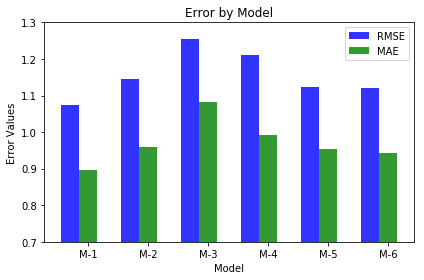

In [22]:
# data to plot
n_groups = 6


# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
 
rects1 = plt.bar(index, rmse_val, bar_width,alpha=opacity,color='b',label='RMSE')
 
rects2 = plt.bar(index + bar_width, mae_val, bar_width,alpha=opacity,color='g',label='MAE')
 
    
plt.xlabel('Model')
plt.ylabel('Error Values')
plt.title('Error by Model')
plt.xticks(index + bar_width, ('M-1', 'M-2','M-3','M-4','M-5', 'M-6'))
plt.legend()
 
plt.tight_layout()

axes = plt.gca()
axes.set_ylim([0.70,1.3])

plt.show()

In [71]:

newArr1=[]
newArr2=[]
newArr3=[]
for item in results_rmse:
    newArr1.append(float(item))
    
for item in results_mae:
    newArr2.append(float(item))
    
for item in results_std:
    newArr3.append(float(item))


rmse_val = newArr1
mae_val = newArr2
std_val= newArr3
        

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd


modelNames= ['M1','M2','M3','M4','M5','M6']



df = pd.DataFrame(mae_val,index=modelNames,columns=['MAE'])


dfStd = pd.DataFrame(std_val,index=modelNames,columns=['StdDev'])

dfStd




,StdDev
M1,0.592690
M2,0.623768
M3,0.633502
M4,0.693902
M5,0.590263
M6,0.606875


In [73]:
df

,MAE
M1,0.896930
M2,0.959382
M3,1.082461
M4,0.991190
M5,0.954605
M6,0.942621


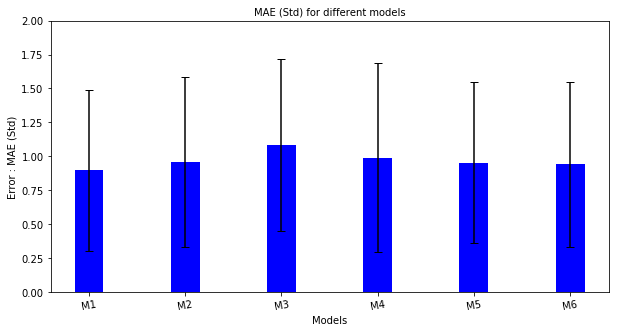

In [94]:

p = df.plot(figsize=(10,5),legend=False,kind="bar",rot=10,color="blue",fontsize=10,yerr=dfStd['StdDev'],width=0.3);
p.set_title("MAE (Std) for different models", fontsize=10);
p.set_xlabel("Models", fontsize=10);
p.set_ylabel("Error : MAE (Std)", fontsize=10);

p.set_ylim(0,2);

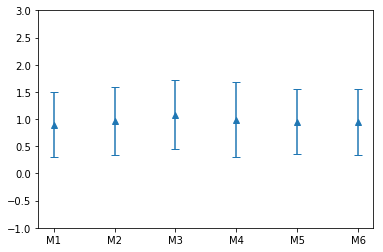

In [91]:
import pandas as pd
import matplotlib.pylab as plt



plt.errorbar(range(len(df['MAE'])), df['MAE'], yerr=dfStd['StdDev'], fmt='^')
plt.xticks(range(len(df['MAE'])), df.index.values)
plt.ylim([-1, 3])
plt.rcParams['errorbar.capsize']=4
plt.show()

In [3]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

results_mae=[0.8969300022492042,
 0.9593815402342722,
 1.0824612929270818,
 0.9911895095714871,
 0.9546054349495814,
 0.9426209605657138]

results_std=[0.592690230798271,
 0.6237677673564315,
 0.6335018816522697,
 0.693901551170415,
 0.5902626748442625,
 0.606875061333133]


#newArr1=[]
newArr2=[]
newArr3=[]
#for item in results_rmse:
    #newArr1.append(float(item))
    
for item in results_mae:
    newArr2.append(float(item))
    
for item in results_std:
    newArr3.append(float(item))


#rmse_val = newArr1
mae_val = newArr2
std_val= newArr3
        

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd


modelNames= ['M1','M2','M3','M4','M5','M6']



df = pd.DataFrame(mae_val,index=modelNames,columns=['MAE'])


dfStd = pd.DataFrame(std_val,index=modelNames,columns=['StdDev'])

dfStd




,StdDev
M1,0.592690
M2,0.623768
M3,0.633502
M4,0.693902
M5,0.590263
M6,0.606875
